In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

import os
print(os.listdir())

['.ipynb_checkpoints', 'data', 'dz_02.ipynb']


### 1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .  
### 2. Оцените ошибку модели из п.1 .

In [2]:
data = pd.read_csv('data/my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
h1 = 1
h10 = 10

In [4]:
d_data=data.resample('D').mean()
d_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0


In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
data_exp_1

[31080.739130434784,
 31239.779257246377,
 31403.384044384056,
 31518.98775883152,
 31463.29462088994,
 31406.30905651211,
 31502.68527035317,
 31645.696840168843,
 31752.220331493732,
 31738.18639825238,
 31698.65416167309,
 31537.065203589435,
 31362.85361007663,
 31374.858846239462,
 31367.30548726082,
 31399.427712897777,
 31423.52091058622,
 31454.501115056908,
 31478.092725970728,
 31378.33392300552,
 31431.163060188577,
 31436.586157179147,
 31439.473515986854,
 31398.287340187508,
 31337.564639844797,
 31174.519741185886,
 30948.072920793256,
 30875.06094142026,
 30782.71831101591,
 30672.324062131782,
 30657.49952569186,
 30607.768299407264,
 30509.734051103565,
 30414.184848548386,
 30521.6589394543,
 30743.286409148248,
 30854.624172024167,
 30923.147130089623,
 30918.473106918475,
 30758.72028490588,
 30560.161353993917,
 30575.47828629422,
 30692.13562197951,
 30755.787174213867,
 30876.77906550317,
 30916.175528894677,
 30712.97091911661,
 30521.484873160778,
 30541.86687

Text(0.5, 1.0, 'PJME_MW')

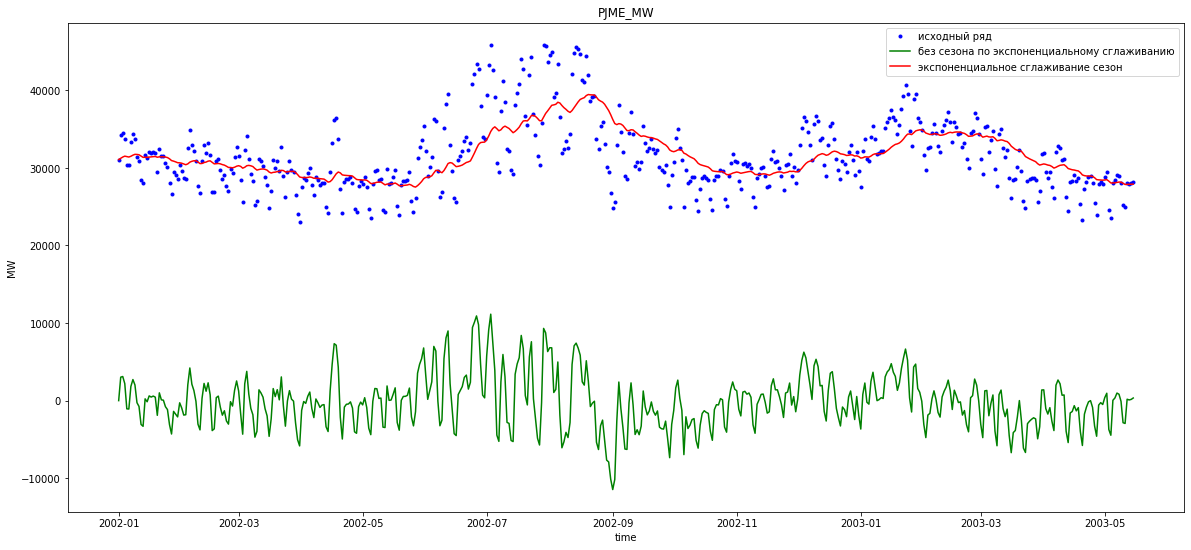

In [6]:
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [7]:
df= pd.DataFrame(data_exp_1)
df.head()


,0
0,31080.739130
1,31239.779257
2,31403.384044
3,31518.987759
4,31463.294621


### Делаем данные с историей = 8

In [8]:
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df['t3']=0
df.iloc[4:,4]=df.iloc[:-4,0].values
df['t4']=0
df.iloc[5:,5]=df.iloc[:-5,0].values
df['t5']=0
df.iloc[6:,6]=df.iloc[:-6,0].values
df['t6']=0
df.iloc[7:,7]=df.iloc[:-7,0].values
df.fillna(0)

df.head(10)

,0,t,t1,t2,t3,t4,t5,t6
0,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000
3,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000
4,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000
5,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000
6,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000
7,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130
8,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257
9,31738.186398,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044


In [9]:
len(df)

6059

In [10]:
df.iloc[:3,:]

,0,t,t1,t2,t3,t4,t5,t6
0,31080.739130,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,31239.779257,31080.739130,0.00000,0.0,0.0,0.0,0.0,0.0
2,31403.384044,31239.779257,31080.73913,0.0,0.0,0.0,0.0,0.0


In [11]:
split_idx = int(len(df)*0.9)
print("Split idx:", split_idx)

Split idx: 5453


In [12]:
train_b = df.iloc[:split_idx,:]
train_b.tail()

,0,t,t1,t2,t3,t4,t5,t6
5448,28035.086596,28016.643785,27992.741265,27926.078525,27806.850202,27837.533107,27908.600639,27984.853743
5449,28116.446850,28035.086596,28016.643785,27992.741265,27926.078525,27806.850202,27837.533107,27908.600639
5450,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265,27926.078525,27806.850202,27837.533107
5451,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265,27926.078525,27806.850202
5452,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265,27926.078525


In [13]:
test_b = df.iloc[split_idx:,:]
test_b.head()

,0,t,t1,t2,t3,t4,t5,t6
5453,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265
5454,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785
5455,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596
5456,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850
5457,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924


### Сделаем данные для h=1

In [14]:
X_train_b_h1 = train_b.iloc[:-1,:]
y_train_b_h1 = train_b[train_b.columns[0]].values[1:]

In [15]:
X_train_b_h1.head(10)

,0,t,t1,t2,t3,t4,t5,t6
0,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000
3,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000
4,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000
5,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000
6,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000
7,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130
8,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257
9,31738.186398,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044


In [16]:
y_train_b_h1[:10]

array([31239.77925725, 31403.38404438, 31518.98775883, 31463.29462089,
       31406.30905651, 31502.68527035, 31645.69684017, 31752.22033149,
       31738.18639825, 31698.65416167])

In [17]:
X_test_b_h1 = test_b.iloc[:-1,:]
y_test_b_h1 = test_b[test_b.columns[0]].values[1:]

In [18]:
X_test_b_h1.head(10)

,0,t,t1,t2,t3,t4,t5,t6
5453,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265
5454,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785
5455,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596
5456,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850
5457,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924
5458,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678
5459,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560
5460,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882
5461,29882.875966,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638
5462,30285.094667,29882.875966,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390


In [19]:
y_test_b_h1[:10]

array([28541.31163834, 28749.47938976, 29021.18875361, 29203.40014926,
       29386.42180846, 29554.96113471, 29721.86724464, 29882.87596574,
       30285.09466745, 30759.72743408])

### Сделаем данные для h=10

In [20]:
h=10
X_train_b_h10 = train_b.iloc[:-h,:]
y_train_b_h10 = train_b[train_b.columns[0]].values[h:]
X_test_b_h10 = test_b.iloc[:-h,:]
y_test_b_h10 = test_b[test_b.columns[0]].values[h:]

In [21]:
X_train_b_h10.head(11)

,0,t,t1,t2,t3,t4,t5,t6
0,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000,0.000000
3,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000,0.000000
4,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000,0.000000
5,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000,0.000000
6,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130,0.000000
7,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257,31080.739130
8,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044,31239.779257
9,31738.186398,31752.220331,31645.696840,31502.685270,31406.309057,31463.294621,31518.987759,31403.384044


In [22]:
y_train_b_h10[:11]

array([31698.65416167, 31537.06520359, 31362.85361008, 31374.85884624,
       31367.30548726, 31399.4277129 , 31423.52091059, 31454.50111506,
       31478.09272597, 31378.33392301, 31431.16306019])

In [23]:
X_test_b_h10.head(11)

,0,t,t1,t2,t3,t4,t5,t6
5453,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785,27992.741265
5454,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596,28016.643785
5455,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850,28035.086596
5456,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924,28116.446850
5457,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678,28113.184924
5458,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560,28096.500678
5459,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882,28214.048560
5460,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638,28405.064882
5461,29882.875966,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390,28541.311638
5462,30285.094667,29882.875966,29721.867245,29554.961135,29386.421808,29203.400149,29021.188754,28749.479390


In [24]:
y_test_b_h10[:11]

array([30759.72743408, 30958.57022904, 30912.53130092, 31129.85890254,
       31403.80762408, 31605.12765955, 31668.70044324, 31666.88625441,
       31556.75235835, 31339.12724044, 31278.49796175])

In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Для h=1

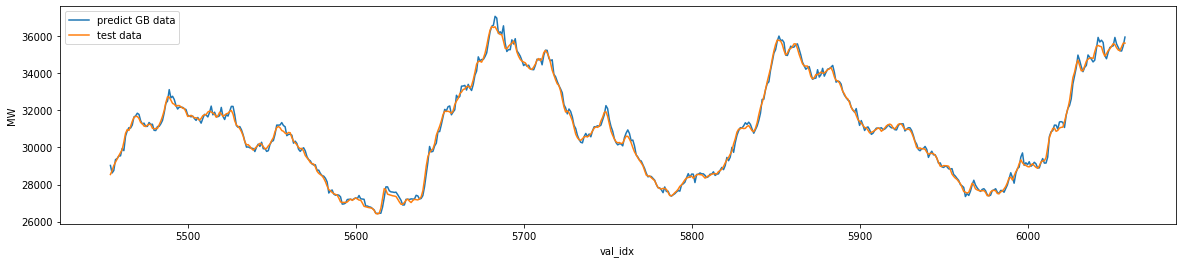

ошибка градиентного бустинга :   0.44048251413288925 %


In [26]:
h=1
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit(X_train_b_h1, y_train_b_h1) 
X_test_pred_gb = model_gb.predict(X_test_b_h1)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('val_idx')
plt.ylabel('MW')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b_h1, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b_h1, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

### Для h=10

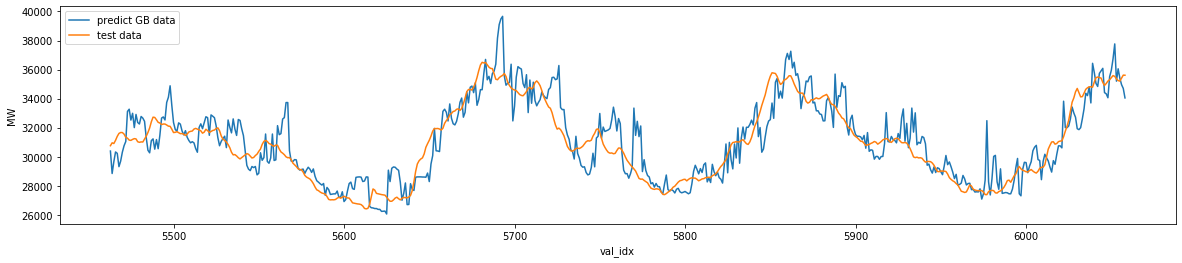

ошибка градиентного бустинга :   3.2730958054245898 %


In [27]:
h=10
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit(X_train_b_h10, y_train_b_h10) 
X_test_pred_gb = model_gb.predict(X_test_b_h10)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('val_idx')
plt.ylabel('MW')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b_h10, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b_h10, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

### 3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

С увеличением глубины прогноза с 1 до 10 ошибка градиентного бустинга значительно увеличилась, то есть модели трудно предсказывать значения которые находятся на большом удалении от истории. и чем дальше удаление тем выше будет ошибка.